In [38]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
taxidata=pd.read_csv('C:/Users/Madhumita.Ganesan/Desktop/DataScience/data/nyctaxi/nycTaxiData/trip_data_500k.csv',engine='python')
taxifare=pd.read_csv('C:/Users/Madhumita.Ganesan/Desktop/DataScience/data/nyctaxi/nycTaxiData/trip_fare_500k.csv',engine='python')

In [40]:
type(taxidata)

pandas.core.frame.DataFrame

In [44]:
print(type(taxifare))
taxifare.columns


<class 'pandas.core.frame.DataFrame'>


Index(['medallion', 'hack_license', 'vendor_id', 'pickup_datetime',
       'payment_type', 'fare_amount', 'surcharge', 'mta_tax', 'tip_amount',
       'tolls_amount', 'total_amount'],
      dtype='object')

In [47]:
taxifare.columns
#taxidata.columns
taxifare.head()
#taxifare.dtypes
##Data Cleanup

taxifare['pickup_date']=pd.to_datetime(taxifare['pickup_datetime'],format="%Y-%m-%d",infer_datetime_format=False,exact=True)
taxifare.columns
#del taxifare['pickup_datetime']
taxifare.columns

print(taxifare['pickup_date'].head())

0   2013-01-01 15:11:48
1   2013-01-06 00:18:35
2   2013-01-05 18:49:41
3   2013-01-07 23:54:15
4   2013-01-07 23:25:03
Name: pickup_date, dtype: datetime64[ns]


In [48]:
taxifare['pickup_date'].head()
taxifare['pickup_day'] = taxifare['pickup_date'].dt.day_name()
taxifare['pickup_day_category']=np.where((taxifare['pickup_day'] == 'Saturday') | (taxifare['pickup_day'] == 'Sunday'),'Weekend','Weekday')
taxifare.columns

print(taxifare['pickup_day'].value_counts())
print(taxifare['pickup_day_category'].value_counts())

Monday       216468
Sunday       155724
Tuesday      126590
Saturday        426
Wednesday       331
Friday          314
Thursday        147
Name: pickup_day, dtype: int64
Weekday    343850
Weekend    156150
Name: pickup_day_category, dtype: int64


In [54]:
taxifare.head(7)
#del taxifare['pickup_datetime']
taxifare.head(7)
taxifare.columns

Index(['medallion', 'hack_license', 'vendor_id', 'payment_type', 'fare_amount',
       'surcharge', 'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount',
       'pickup_date', 'pickup_day', 'pickup_day_category'],
      dtype='object')

Text(0.5, 1.0, 'Fare amount paid accross all times')

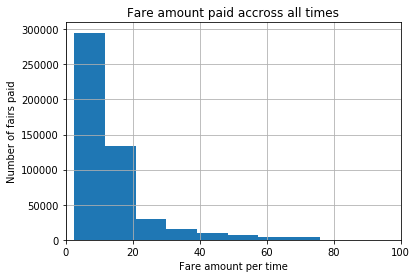

In [63]:
## Distribution of Fares paid 
##Accross all times
plt.xlim(xmin=0, xmax = 100)
fare_dist=taxifare['total_amount'].hist(bins=50)
sns.mpl.pyplot.ylabel('Number of fairs paid')
sns.mpl.pyplot.xlabel('Fare amount per time')
sns.mpl.pyplot.title('Fare amount paid accross all times')

Text(0.5, 1.0, 'Fare amount paid Weekdays/Weekends Separate Graphs')

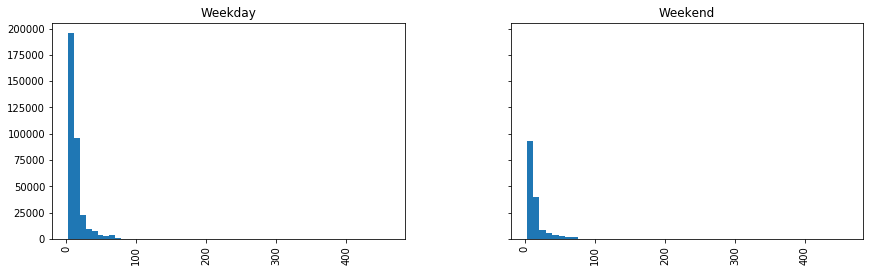

In [69]:
## Weekdays versus Weekends
fare_dist=taxifare['total_amount'].hist(by=taxifare['pickup_day_category'],bins=50,sharex=True,sharey=True,layout=(2,4),figsize=(30,10))
plt.xlim(xmin=0, xmax = 100)
sns.mpl.pyplot.title('Fare amount paid Weekdays/Weekends Separate Graphs')

Text(0.5, 1.0, 'Fare amount paid Weekdays/Weekends Staked Histogram')

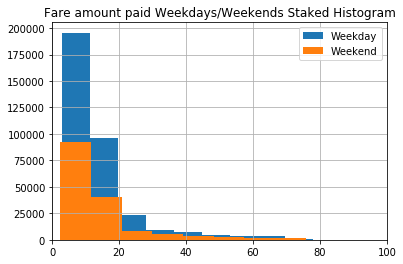

In [66]:
plt.xlim(xmin=0, xmax = 100)
stackedhistogram=taxifare['total_amount'].groupby(taxifare['pickup_day_category']).hist(bins=50)
sns.mpl.pyplot.legend(stackedhistogram.index)
sns.mpl.pyplot.title('Fare amount paid Weekdays/Weekends Staked Histogram')